<a href="https://colab.research.google.com/github/ana-medinac/amlCornell/blob/HW1---AML/am2667_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [22]:
import io
ds = pd.read_csv('train.csv')

print(ds.shape)
ds.head()


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
print(ds)
ds.shape
ds.head(2)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [24]:
## here going to try to identify values that are continuous 
ds.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

3 categorical values:

*   MSZoning
*   SaleType
* Condition

3 continuous values:

* ID
*MSSubClass
*LotFrontage OR
*LotArea



In [25]:
ds['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

Just confirming that I got this right. 

Text(0.5, 1.0, 'Histogram of MSSubClass')

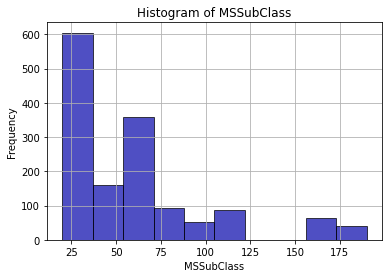

In [26]:
## going to build a histogram now for 1 continuous feature --> MSSubClass

#!!!!ds.hist(column='MSSubClass')

plt.hist(x=ds['MSSubClass'], color='#0504aa', alpha=0.7, ec="k")
plt.grid(True)
plt.xlabel('MSSubClass')
plt.ylabel('Frequency')
plt.title('Histogram of MSSubClass')




I NEED TO ADD AXIS LABEL!!!

Text(0.5, 1.0, 'Barplot of MSZoning')

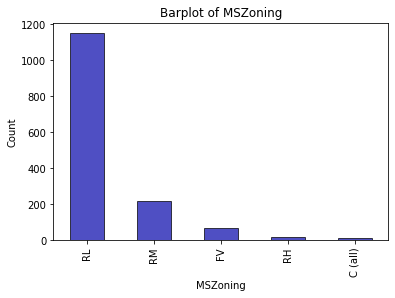

In [27]:
## Now going to plot categorical data 

#!!!!ds['MSZoning'].value_counts().plot(kind='bar')

ds['MSZoning'].value_counts().plot(kind='bar', color='#0504aa', alpha=0.7, ec="k")
plt.xlabel("MSZoning")
plt.ylabel("Count")
plt.title("Barplot of MSZoning")

Also missing labels!!!! 🙃

In [28]:
# Question 3 -- Pre-process your data, explain your pre-processing steps, and the reasons why you need them.
#(Hint: data pre-processing steps can include but are not restricted to: dealing with missing values,
# normalizing numerical values, dealing with categorical values etc.)

ds.shape
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Ok at first glance info:

* a lot of these have missing values
* there is a variety of data types (maybe we should try to convert floats to integers so that they're all the same)
* Are there any not useful columns that we could drop?

In [29]:
#formula to include or exclude stuff: numeric_df=train_ds.select_dtypes(include= (numpy=numeric))

We will use seaborn to create a simple heatmap to see where we are missing data!

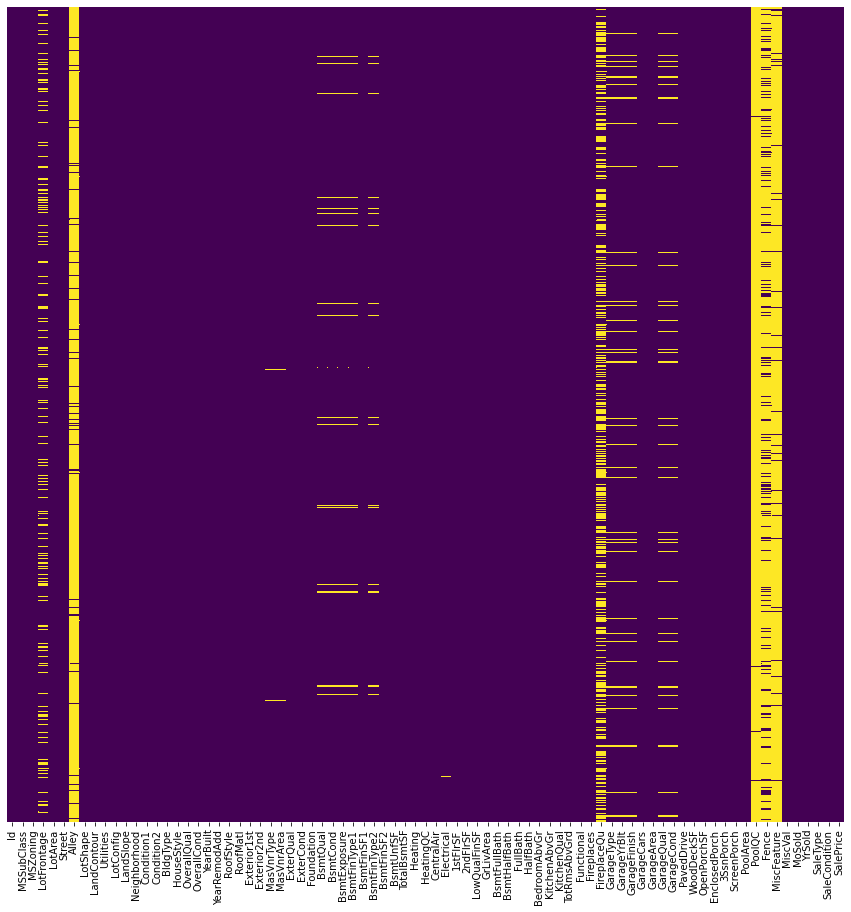

In [30]:
fig = plt.subplots(figsize=(15,15)) # Create a big image of heatmap, so that we can see it better
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Dealing with missing values

In [31]:
# we will find the percentage of missing values for each column and then drop the columns that more than 30% of values are missing
total = ds.isnull().sum().sort_values(ascending=False)
percent = (ds.isnull().sum()/len(ds)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [32]:
# Remove Columns that have more than 30% missing values
ds.drop((missing_data[missing_data['Percent'] > 0.30]).index,1,inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Other Columns that are missing data are:
LotFrontage, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, 
BsmtFinType2, Electrical, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond

But we can fill them out, since we have enough information :)

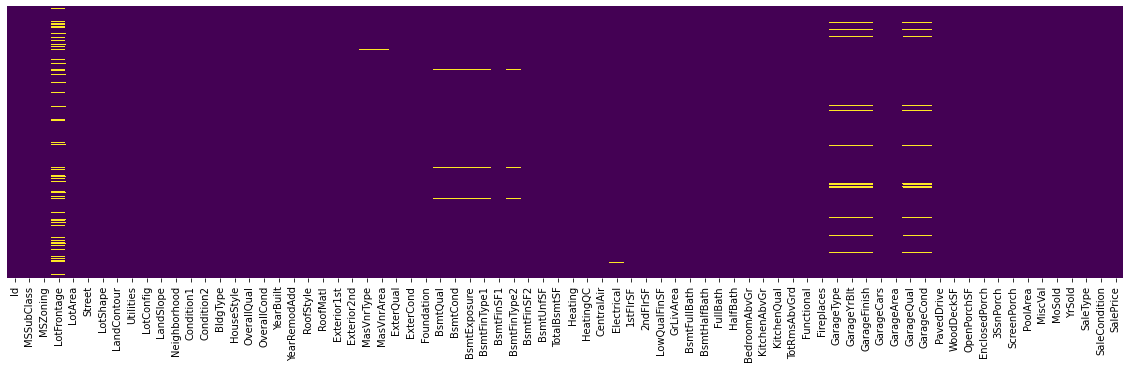

In [33]:
# now we will visualize the missing values
fig = plt.subplots(figsize=(20,5))  
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False,cmap='viridis')

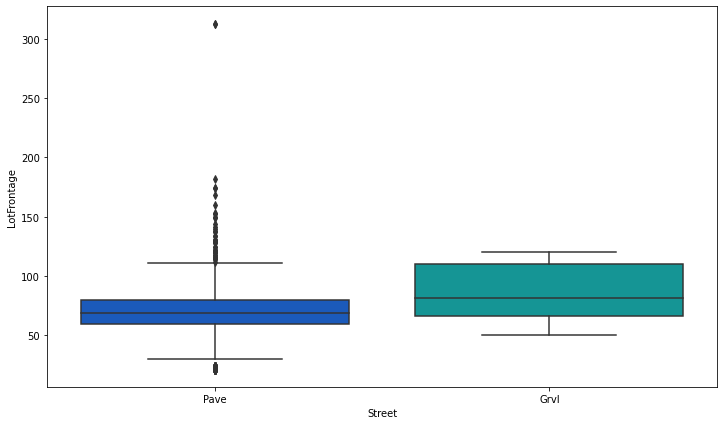

In [34]:
plt.figure(figsize=(12, 7))
box_plot = sns.boxplot(x='Street',y='LotFrontage',data=ds,palette='winter')

There are 2 samples that have a very different value for LotFrontage (>300), even greater that other outliers, so we will set them as the value of the 75% percentile.

In [35]:
q = ds.groupby(['Street'])['LotFrontage'].quantile([0.25,0.5,0.75])
q

Street      
Grvl    0.25     66.0
        0.50     81.0
        0.75    110.0
Pave    0.25     59.0
        0.50     69.0
        0.75     80.0
Name: LotFrontage, dtype: float64

In [36]:
ds.loc[ds["LotFrontage"] > 300, "LotFrontage"] = q[5]

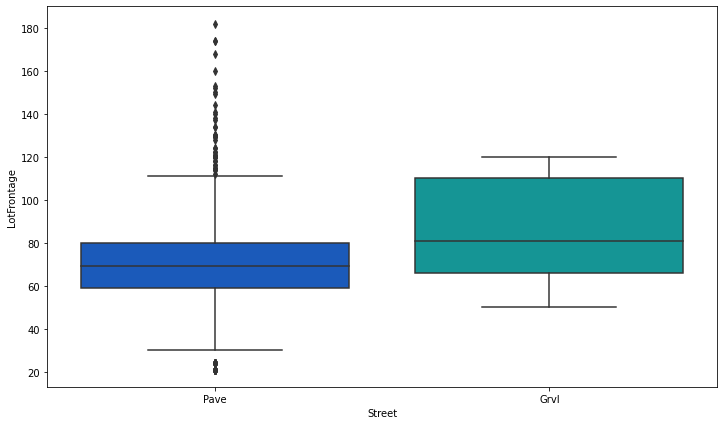

In [37]:
plt.figure(figsize=(12, 7))
box_plot = sns.boxplot(x='Street',y='LotFrontage',data=ds,palette='winter')

There seems to be a correlation, bigger LotFrontage appears for Street 'Grvl'. We'll use these average age values to impute based on Street for LotFrontage.

In [38]:
def impute_LotFrontage(cols):
    LotFrontage = cols[0]
    Street = cols[1]
    
    if pd.isnull(LotFrontage):

        if Street == 'Pave':
            return 69

        else:
            return 81

    else:
        return LotFrontage

In [39]:
ds['LotFrontage'] = ds[['LotFrontage','Street']].apply(impute_LotFrontage,axis=1)

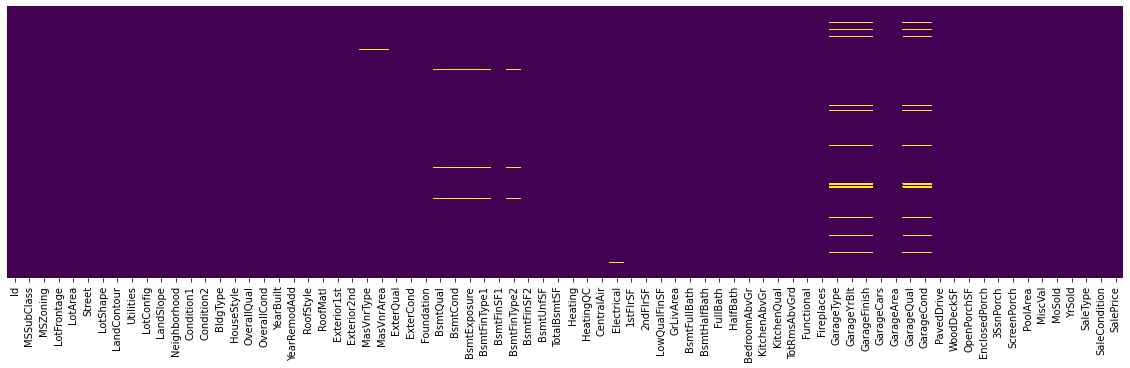

In [40]:
fig = plt.subplots(figsize=(20,5))  
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [41]:
# Replace remaining values with Median for Numeric and mode for categorical
ds.fillna(ds.agg(['median',lambda x : x.value_counts().index[0]]).ffill().iloc[-1,:],inplace = True)

Normalize numerical data

In [42]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numds = ds.select_dtypes(include=numerics)
numds

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


We will normilize the numeric columns that have areas and are in different size class. We do not want to do that for columns that just count.

In [43]:
ds['LotFrontage'] = ds['LotFrontage']  / ds['LotFrontage'].abs().max()
ds['LotArea'] = ds['LotArea']  / ds['LotArea'].abs().max()
ds['MasVnrArea'] = ds['MasVnrArea']  / ds['MasVnrArea'].abs().max()
ds['BsmtFinSF1'] = ds['BsmtFinSF1']  / ds['BsmtFinSF1'].abs().max()
ds['BsmtFinSF2'] = ds['BsmtFinSF2']  / ds['BsmtFinSF2'].abs().max()
ds['BsmtUnfSF'] = ds['BsmtUnfSF']  / ds['BsmtUnfSF'].abs().max()
ds['TotalBsmtSF'] = ds['TotalBsmtSF']  / ds['TotalBsmtSF'].abs().max()
ds['1stFlrSF'] = ds['1stFlrSF']  / ds['1stFlrSF'].abs().max()
ds['2ndFlrSF'] = ds['2ndFlrSF']  / ds['2ndFlrSF'].abs().max()
ds['GrLivArea'] = ds['GrLivArea']  / ds['GrLivArea'].abs().max()
ds['GarageArea'] = ds['GarageArea']  / ds['GarageArea'].abs().max()
ds['WoodDeckSF'] = ds['WoodDeckSF']  / ds['WoodDeckSF'].abs().max()
ds['EnclosedPorch'] = ds['EnclosedPorch']  / ds['EnclosedPorch'].abs().max()
ds['3SsnPorch'] = ds['3SsnPorch']  / ds['3SsnPorch'].abs().max()
ds['ScreenPorch'] = ds['ScreenPorch']  / ds['ScreenPorch'].abs().max()
ds['PoolArea'] = ds['PoolArea']  / ds['PoolArea'].abs().max()

dealing with categorical values:
Dealing with categorical values it is useful to put them values 1-2-3 or dummy values. For variables that the categories are scaling (such as level of quality etc) we will use the former one and for variables that the categories do not have a correlation we will use the latter one.

In [44]:
ds['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In the 'MSZoning' column, we want A to be 0, FV to be 1, Rp to be 2, RL to be 3, Rm to be 4, RH to be 5, C to be 6 and I to be 7.
Respectively, for the other columns

In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
MSZoning_categories = ['A', 'FV', 'RP', 'RL', 'RM', 'RH', 'C (all)', 'I']
ExterQual_categories = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterCond_categories = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtCond_categories = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtExposure_categories = ['NA', 'No', 'Mn', 'Av', 'Gd']
BsmtFinType1_categories = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
HeatingQC_categories = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
KitchenQual_categories = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageType_categories = ['NA', 'Detchd', 'CarPort', 'BuiltIn', 'Basment', 'Attchd', '2Types']
GarageQual_categories = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

encoder = OrdinalEncoder(categories=[MSZoning_categories, ExterQual_categories, ExterCond_categories, BsmtCond_categories, BsmtExposure_categories, BsmtFinType1_categories, HeatingQC_categories, KitchenQual_categories, GarageType_categories, GarageQual_categories])
ar = encoder.fit_transform(ds[['MSZoning', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageQual']])

In [47]:
# Now we need to replace the new values to our original dataset based on the category
for i, c in enumerate(ds):
    ds['MSZoning'][i] = ar[i][0]
    ds['ExterQual'][i] = ar[i][1]
    ds['ExterCond'][i] = ar[i][2]
    ds['BsmtCond'][i] = ar[i][3]
    ds['BsmtExposure'][i] = ar[i][4]
    ds['BsmtFinType1'][i] = ar[i][5]
    ds['HeatingQC'][i] = ar[i][6]
    ds['KitchenQual'][i] = ar[i][7]
    ds['GarageType'][i] = ar[i][8]
    ds['GarageQual'][i] = ar[i][9]
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

We will use one hot encoding (question 4) for the categorical columns, that do not have any ranking for the category values. Examples of these columns are:
1. RoofMatl
2. RoofMatl
3. Foundation


In [48]:
ohe_ds = ds.copy()
ohe_ds = ohe_ds

In [49]:
# With pandas, we will convert these 3 features to one-hot-encoding, since these features do not have raking values.
ds_ohe = pd.get_dummies(ds, columns=["RoofMatl", 'MasVnrType', 'Foundation'])
ds_ohe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,1,60,3.0,0.357143,0.039258,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,0,0,0,1,0,0,0
1,2,20,3.0,0.439560,0.044600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,1,0,0,1,0,0,0,0
2,3,60,3.0,0.373626,0.052266,Pave,IR1,Lvl,AllPub,Inside,...,0,1,0,0,0,0,1,0,0,0
3,4,70,3.0,0.329670,0.044368,Pave,IR1,Lvl,AllPub,Corner,...,0,0,1,0,1,0,0,0,0,0
4,5,60,3.0,0.461538,0.066250,Pave,IR1,Lvl,AllPub,FR2,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,0.340659,0.036781,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,0,1,0,0,0
1456,1457,20,RL,0.467033,0.061209,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,0,1,0,0,0,0
1457,1458,70,RL,0.362637,0.042008,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,0,0,0,1,0
1458,1459,20,RL,0.373626,0.045144,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,1,0,0,0,0


Visualize the results for feature MasVnrType

In [50]:
# Find the columns that have the dummy variables of MasVnrType
MasVnrType_cols = [col for col in ds_ohe.columns if 'MasVnrType' in col]
MasVnrType_cols

['MasVnrType_BrkCmn',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVnrType_Stone']

In [51]:
# Keep only the columns with the dummy variables of MasVnrType
dsMasVnrType = ds_ohe.loc[:, ds_ohe.columns.str.contains('MasVnrType')]
dsMasVnrType

,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
1455,0,0,1,0
1456,0,0,0,1
1457,0,0,1,0
1458,0,0,1,0


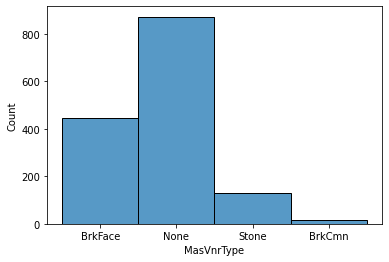

In [52]:
#this is the histogram without doing the OHE and it's only one plot.
sns.histplot(x='MasVnrType',data=ds)

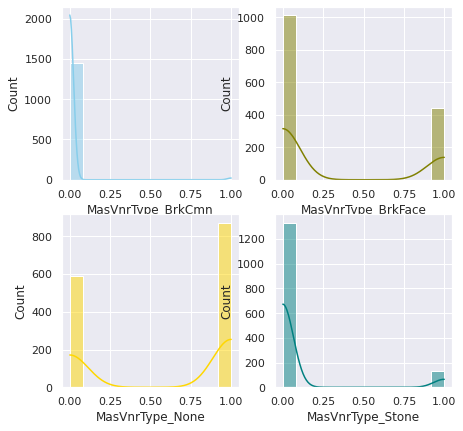

In [53]:
sns.set(style="darkgrid")
df = dsMasVnrType
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df, x="MasVnrType_BrkCmn", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="MasVnrType_BrkFace", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="MasVnrType_None", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="MasVnrType_Stone", kde=True, color="teal", ax=axs[1, 1])


We can see that when plotting the histogram of the original data, we get one graph with 4 columns, each one corresponding to the number of times this category appears. When plotting the respective histogram for the same variable, that is one hot encoding, we get 4 diagrams, each one corresponding to one category and illustrating the number of times that this category appears and doesn't appear.

Question 5: Using ordinary least squares (OLS), try to predict house prices on this dataset

In [54]:
# see the correlation between variables and the variable that we want to predict
cor = ds_ohe[ds_ohe.columns[1:]].corr()['SalePrice'][:]
cor

MSSubClass           -0.084284
LotFrontage           0.362972
LotArea               0.263843
OverallQual           0.790982
OverallCond          -0.077856
YearBuilt             0.522897
YearRemodAdd          0.507101
MasVnrArea            0.472614
BsmtFinSF1            0.386420
BsmtFinSF2           -0.011378
BsmtUnfSF             0.214479
TotalBsmtSF           0.613581
1stFlrSF              0.605852
2ndFlrSF              0.319334
LowQualFinSF         -0.025606
GrLivArea             0.708624
BsmtFullBath          0.227122
BsmtHalfBath         -0.016844
FullBath              0.560664
HalfBath              0.284108
BedroomAbvGr          0.168213
KitchenAbvGr         -0.135907
TotRmsAbvGrd          0.533723
Fireplaces            0.466929
GarageYrBlt           0.397778
GarageCars            0.640409
GarageArea            0.623431
WoodDeckSF            0.324413
OpenPorchSF           0.315856
EnclosedPorch        -0.128578
3SsnPorch             0.044584
ScreenPorch           0.111447
PoolArea

We will create a table with all the variables that have big correlation with SalePrice and then we will drop the ones that have large correlation between them.

In [55]:
ds_ols = ds_ohe[['LotFrontage', 'OverallQual', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood']]
ds_ols

,LotFrontage,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0.357143,7,2003,0.122500,0.140098,0.182438,0.303084,2,8,0,2,0,0,1,0,0,0
1,0.439560,6,1976,0.000000,0.206547,0.268968,0.223680,2,6,1,2,0,1,0,0,0,0
2,0.373626,7,2001,0.101250,0.150573,0.196078,0.316554,2,6,1,2,0,0,1,0,0,0
3,0.329670,7,1915,0.000000,0.123732,0.204817,0.304325,1,7,1,3,1,0,0,0,0,0
4,0.461538,8,2000,0.218750,0.187398,0.244032,0.389578,2,9,1,3,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.340659,6,1999,0.000000,0.155974,0.203112,0.291918,2,7,1,2,0,0,1,0,0,0
1456,0.467033,6,1978,0.074375,0.252373,0.441816,0.367423,2,7,2,2,0,1,0,0,0,0
1457,0.362637,7,1941,0.000000,0.188543,0.253197,0.414747,2,9,2,1,0,0,0,0,1,0
1458,0.373626,5,1950,0.000000,0.176432,0.229753,0.191067,1,5,0,1,0,1,0,0,0,0


In [56]:
ds_ols.corr()

,LotFrontage,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
LotFrontage,1.000000,0.229337,0.121047,0.169361,0.315676,0.362639,0.332625,0.185557,0.312330,0.222197,0.290457,-0.135131,0.021969,0.060047,-0.022850,-0.009223,0.073249
OverallQual,0.229337,1.000000,0.572323,0.407252,0.537808,0.476224,0.593007,0.550600,0.427452,0.396765,0.600671,-0.157709,-0.429761,0.568211,-0.169032,-0.020103,0.018621
YearBuilt,0.121047,0.572323,1.000000,0.311600,0.391452,0.281986,0.199010,0.468271,0.095589,0.147716,0.537850,-0.554742,-0.290574,0.651199,-0.050031,-0.124681,0.028654
MasVnrArea,0.169361,0.407252,0.311600,1.000000,0.360067,0.339850,0.388052,0.272999,0.279568,0.247015,0.361945,-0.177335,-0.065741,0.189236,-0.036965,-0.036664,-0.025899
TotalBsmtSF,0.315676,0.537808,0.391452,0.360067,1.000000,0.819530,0.454868,0.323722,0.285573,0.339519,0.434585,-0.184550,-0.111752,0.307701,-0.311714,-0.023792,-0.020738
1stFlrSF,0.362639,0.476224,0.281986,0.339850,0.819530,1.000000,0.566024,0.380637,0.409516,0.410531,0.439317,-0.161771,-0.093321,0.197188,-0.014789,-0.011435,-0.012285
GrLivArea,0.332625,0.593007,0.199010,0.388052,0.454868,0.566024,1.000000,0.630012,0.825489,0.461679,0.467247,-0.040224,-0.266787,0.292764,-0.043316,0.046372,0.031144
FullBath,0.185557,0.550600,0.468271,0.272999,0.323722,0.380637,0.630012,1.000000,0.554784,0.243671,0.469672,-0.143024,-0.382029,0.461667,0.023849,-0.007590,0.008371
TotRmsAbvGrd,0.312330,0.427452,0.095589,0.279568,0.285573,0.409516,0.825489,0.554784,1.000000,0.326114,0.362289,0.007588,-0.206910,0.192609,-0.001417,0.065188,0.013466
Fireplaces,0.222197,0.396765,0.147716,0.247015,0.339519,0.410531,0.461679,0.243671,0.326114,1.000000,0.300789,-0.076169,-0.037848,0.103510,-0.056105,-0.011265,-0.043163


We can see that 1stFlrSF has strong correlation with some variables, so we will drop it.

In [57]:
ds_ols.drop(['1stFlrSF'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
#ols
theta_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.array(ds_ols).transpose(), np.array(ds_ols))), ds_ols.transpose()), np.array(ds['SalePrice']))
theta_hat

0      56122.115741
1      18980.804996
2        264.177711
3      49389.460218
4     152713.609240
5     255135.986509
6      -3646.727408
7       -381.256708
8       8893.753880
9      11685.194474
10   -595814.149259
11   -597413.679942
12   -588446.306663
13   -586220.076192
14   -590826.784399
15   -619004.697332
dtype: float64

In [59]:
#put the values that we found above into the linear regression model
predictions = 56122.115743*ds_ols['LotFrontage'] + 18980.804996*ds_ols['OverallQual'] + 264.177711*ds_ols['YearBuilt'] + 49389.460217*ds_ols['MasVnrArea'] + 152713.609240*ds_ols['TotalBsmtSF'] + 255135.986513*ds_ols['GrLivArea'] -3646.727408*ds_ols['FullBath'] -381.256708*ds_ols['TotRmsAbvGrd'] +8893.753880*ds_ols['Fireplaces'] + 11685.194474*ds_ols['GarageCars'] -595814.149263*ds_ols['Foundation_BrkTil'] -597413.679946*ds_ols['Foundation_CBlock']-588446.306666*ds_ols['Foundation_PConc'] - 586220.076196*ds_ols['Foundation_Slab'] - 590826.784402*ds_ols['Foundation_Stone'] - 619004.697335*ds_ols['Foundation_Wood']
predictions

0       211410.525861
1       174449.701904
2       225450.404283
3       195627.093405
4       289700.176390
            ...      
1455    193248.231186
1456    232378.146586
1457    228517.608069
1458    115429.414000
1459    133667.615462
Length: 1460, dtype: float64

Calculate MSE (Mean Squared Error) and r2 score



In [61]:
def mean_squared_error(y_test, predictions):
    """The cost function, J, describing the goodness of fit.
    
    Parameters:
    y_test (np.array): n-dimensional vector of targets
    predictions(np.array): n-dimensional vector of targets that were predicted
    """
    y_test = np.array(y_test)
    predictions = np.array(predictions)
    
    return 0.5*np.mean((y_test-predictions)**2)

In [62]:
mse = mean_squared_error(ds['SalePrice'], predictions)
mse

686653668.0138074

In [63]:
def r2_score(y_test, predictions):
    """Calculates the R2 score (computes the coefficient of determination).
    
    Parameters:
    y_test (np.array): n-dimensional vector of targets
    predictions(np.array): n-dimensional vector of targets that were predicted
    """
    y_test = np.array(y_test)
    predictions = np.array(predictions)
    
    y_av = np.mean(y_test)
    return 1 - np.sum(((y_test-predictions)**2))/np.sum((y_test-y_av)**2)
    0.5*np.mean((y_test-predictions)**2)

In [64]:
r2 = r2_score(ds['SalePrice'], predictions)
r2

0.782249346487083

r2 = 0.782, which is a good value for r2



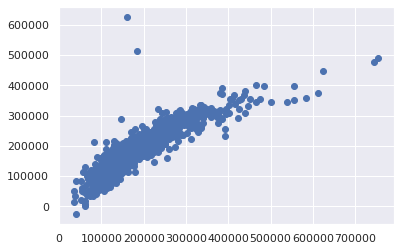

In [65]:
plt.scatter(ds['SalePrice'],predictions)

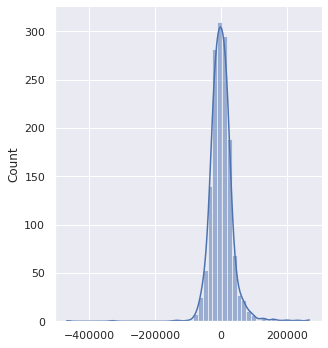

In [66]:
sns.displot((ds['SalePrice']-predictions),bins=50, kde=True);

In [67]:
predictions.to_csv('pred.csv')

The truth is that there are some outliers, but overall the graphs seem to follow a good model.

Question 6

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lm = LinearRegression()

Train the model

In [70]:
lm.fit(ds_ols,ds['SalePrice'])

LinearRegression()

Import the test data and do the same pre process

In [71]:
ds_test = pd.read_csv('HouseTest.csv')

In [72]:
q = ds_test.groupby(['Street'])['LotFrontage'].quantile([0.25,0.5,0.75])
q

Street      
Grvl    0.25     60.0
        0.50     66.0
        0.75    109.0
Pave    0.25     58.0
        0.50     67.0
        0.75     80.0
Name: LotFrontage, dtype: float64

In [73]:
def impute_LotFrontage(cols):
    LotFrontage = cols[0]
    Street = cols[1]
    
    if pd.isnull(LotFrontage):

        if Street == 'Pave':
            return 66

        else:
            return 80

    else:
        return LotFrontage


In [74]:
ds_test['LotFrontage'] = ds_test[['LotFrontage','Street']].apply(impute_LotFrontage,axis=1)

In [75]:
# Replace remaining values with Median for Numeric and mode for categorical
ds_test.fillna(ds.agg(['median',lambda x : x.value_counts().index[0]]).ffill().iloc[-1,:],inplace = True)

In [76]:
ds_test['LotFrontage'] = ds_test['LotFrontage']  / ds_test['LotFrontage'].abs().max()
ds_test['LotArea'] = ds_test['LotArea']  / ds_test['LotArea'].abs().max()
ds_test['MasVnrArea'] = ds_test['MasVnrArea']  / ds_test['MasVnrArea'].abs().max()
ds_test['BsmtFinSF1'] = ds_test['BsmtFinSF1']  / ds_test['BsmtFinSF1'].abs().max()
ds_test['BsmtFinSF2'] = ds_test['BsmtFinSF2']  / ds_test['BsmtFinSF2'].abs().max()
ds_test['BsmtUnfSF'] = ds_test['BsmtUnfSF']  / ds_test['BsmtUnfSF'].abs().max()
ds_test['TotalBsmtSF'] = ds_test['TotalBsmtSF']  / ds_test['TotalBsmtSF'].abs().max()
ds_test['1stFlrSF'] = ds_test['1stFlrSF']  / ds_test['1stFlrSF'].abs().max()
ds_test['2ndFlrSF'] = ds_test['2ndFlrSF']  / ds_test['2ndFlrSF'].abs().max()
ds_test['GrLivArea'] = ds_test['GrLivArea']  / ds_test['GrLivArea'].abs().max()
ds_test['GarageArea'] = ds_test['GarageArea']  / ds_test['GarageArea'].abs().max()
ds_test['WoodDeckSF'] = ds_test['WoodDeckSF']  / ds_test['WoodDeckSF'].abs().max()
ds_test['EnclosedPorch'] = ds_test['EnclosedPorch']  / ds_test['EnclosedPorch'].abs().max()
ds_test['3SsnPorch'] = ds_test['3SsnPorch']  / ds_test['3SsnPorch'].abs().max()
ds_test['ScreenPorch'] = ds_test['ScreenPorch']  / ds_test['ScreenPorch'].abs().max()
ds_test['PoolArea'] = ds_test['PoolArea']  / ds_test['PoolArea'].abs().max()


In [77]:
MSZoning_categories = ['A', 'FV', 'RP', 'RL', 'RM', 'RH', 'C (all)', 'I']
ExterQual_categories = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterCond_categories = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtCond_categories = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtExposure_categories = ['NA', 'No', 'Mn', 'Av', 'Gd']
BsmtFinType1_categories = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
HeatingQC_categories = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
KitchenQual_categories = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageType_categories = ['NA', 'Detchd', 'CarPort', 'BuiltIn', 'Basment', 'Attchd', '2Types']
GarageQual_categories = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

In [78]:
encoder = OrdinalEncoder(categories=[MSZoning_categories, ExterQual_categories, ExterCond_categories, BsmtCond_categories, BsmtExposure_categories, BsmtFinType1_categories, HeatingQC_categories, KitchenQual_categories, GarageType_categories, GarageQual_categories])
ar = encoder.fit_transform(ds_test[['MSZoning', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageQual']])

In [79]:
for i, c in enumerate(ds_test):
    ds_test['MSZoning'][i] = ar[i][0]
    ds_test['ExterQual'][i] = ar[i][1]
    ds_test['ExterCond'][i] = ar[i][2]
    ds_test['BsmtCond'][i] = ar[i][3]
    ds_test['BsmtExposure'][i] = ar[i][4]
    ds_test['BsmtFinType1'][i] = ar[i][5]
    ds_test['HeatingQC'][i] = ar[i][6]
    ds_test['KitchenQual'][i] = ar[i][7]
    ds_test['GarageType'][i] = ar[i][8]
    ds_test['GarageQual'][i] = ar[i][9]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [80]:
ds_test = pd.get_dummies(ds_test, columns=["RoofMatl", 'MasVnrType', 'Foundation'])

Keep only the columns that we are interested in

In [81]:
ds_test = ds_test[['LotFrontage', 'OverallQual', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood']]

In [82]:
ds_test.drop(['1stFlrSF'], axis=1, inplace=True)

Predict the prices

In [83]:
predictions = lm.predict(ds_test)

In [84]:
pred=pd.DataFrame(predictions, columns=['SalePrice']) 

In [85]:
pred.to_csv('pred.csv')